In [1]:
import pandas as pd
import numpy as npt
import seaborn as sns   
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Different_stores_dataset .csv")
df.head(5)

,invoice_no,invoice_date,customer_id,gender,age,category,quantity,selling_price_per_unit,cost_price_per_unit,payment_method,region,state,shopping_mall
0,I138884,10/30/2016 9:58,C241288,Female,28,Clothing,5,1500.40,1425.380,Credit Card,South,Kentucky,Kanyon
1,I317333,10/30/2016 9:58,C111565,Male,21,Shoes,3,1800.51,1620.459,Debit Card,South,Kentucky,Viaport Outlet
2,I127801,10/30/2016 9:58,C266599,Male,20,Clothing,1,300.08,295.060,Cash,West,California,Metrocity
3,I173702,10/30/2016 9:58,C988172,Female,66,Shoes,5,3000.85,2900.765,Credit Card,South,Florida,Metropol AVM
4,I337046,10/30/2016 9:59,C189076,Female,53,Books,4,60.60,45.450,Cash,South,Florida,Kanyon


# Check missing values and duplicate records

In [8]:
duplicate_records = df[df.duplicated()]
duplicate_records

,invoice_no,invoice_date,customer_id,gender,age,category,quantity,selling_price_per_unit,cost_price_per_unit,payment_method,region,state,shopping_mall


In [10]:
missing_values = df.isnull().sum()
missing_values

invoice_no                0
invoice_date              0
customer_id               0
gender                    0
age                       0
category                  0
quantity                  0
selling_price_per_unit    0
cost_price_per_unit       0
payment_method            0
region                    0
state                     0
shopping_mall             0
dtype: int64

# Add column name 'Total Sales'

In [11]:
df['Total Sales'] = df['quantity'] * df['selling_price_per_unit']
print(df.head())

  invoice_no     invoice_date customer_id  gender  age  category  quantity  \
0    I138884  10/30/2016 9:58     C241288  Female   28  Clothing         5   
1    I317333  10/30/2016 9:58     C111565    Male   21     Shoes         3   
2    I127801  10/30/2016 9:58     C266599    Male   20  Clothing         1   
3    I173702  10/30/2016 9:58     C988172  Female   66     Shoes         5   
4    I337046  10/30/2016 9:59     C189076  Female   53     Books         4   

   selling_price_per_unit  cost_price_per_unit payment_method region  \
0                 1500.40             1425.380    Credit Card  South   
1                 1800.51             1620.459     Debit Card  South   
2                  300.08              295.060           Cash   West   
3                 3000.85             2900.765    Credit Card  South   
4                   60.60               45.450           Cash  South   

        state   shopping_mall  Total Sales  
0    Kentucky          Kanyon      7502.00  
1    Ken

# How many customers have age more than 60?

In [12]:
customers_above_60 = df.query("age > 60").shape[0]

print(f"Number of customers with age greater than 60: {customers_above_60}")

Number of customers with age greater than 60: 17169


# How many unique customer_id entries are there? Do any customers make multiple purchases?

In [13]:
# Count unique customer IDs
unique_customers = df['customer_id'].nunique()
print(f"Number of unique customers: {unique_customers}")

Number of unique customers: 99457


In [14]:
multiple_purchases = df['customer_id'].value_counts()
customers_with_multiple_purchases = (multiple_purchases > 1).sum()

print(f"Number of customers with multiple purchases: {customers_with_multiple_purchases}")

Number of customers with multiple purchases: 0


# Are there more male or female customers, Show in Pie Chart

In [17]:
gender_counts = df['gender'].value_counts()

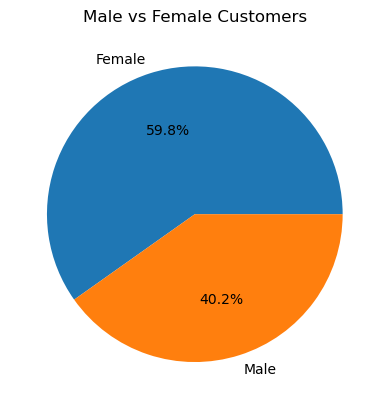

In [18]:
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title("Male vs Female Customers")
plt.show()

# Which category is least popular among customers?

In [19]:
category_counts = df['category'].value_counts()

In [21]:
least_popular_count = category_counts.min()
least_popular_category = category_counts.idxmin()
print(f"Least popular category: {least_popular_category} with {least_popular_count} purchases.")

Least popular category: Books with 4981 purchases.


# Which category has the highest sales volume?

In [22]:
category_sales = df.groupby('category')['quantity'].sum()

In [23]:
highest_sales_category = category_sales.idxmax()

In [24]:
highest_sales_volume = category_sales.max()
print(f"Category with the highest sales volume: {highest_sales_category} with {highest_sales_volume} units sold.")

Category with the highest sales volume: Clothing with 103598 units sold.


# Add column name 'Total Profit' 

In [39]:
df['Total Profit'] = df['Total Sales'] - df['Total Costs']
print(df.head())

  invoice_no     invoice_date customer_id  gender  age  category  quantity  \
0    I138884  10/30/2016 9:58     C241288  Female   28  Clothing         5   
1    I317333  10/30/2016 9:58     C111565    Male   21     Shoes         3   
2    I127801  10/30/2016 9:58     C266599    Male   20  Clothing         1   
3    I173702  10/30/2016 9:58     C988172  Female   66     Shoes         5   
4    I337046  10/30/2016 9:59     C189076  Female   53     Books         4   

   selling_price_per_unit  cost_price_per_unit payment_method region  \
0                 1500.40             1425.380    Credit Card  South   
1                 1800.51             1620.459     Debit Card  South   
2                  300.08              295.060           Cash   West   
3                 3000.85             2900.765    Credit Card  South   
4                   60.60               45.450           Cash  South   

        state   shopping_mall  Total Sales  Total Profit  Total Costs  
0    Kentucky          Kan

# Display the top 10 invoices with the highest quantities sold?

In [29]:
top_10_invoices = df.nlargest(10, 'quantity')
print(top_10_invoices)

    invoice_no      invoice_date customer_id  gender  age    category  \
100    I283443  10/30/2016 10:21     C189493    Male   43  Technology   
109    I293215  10/30/2016 10:23     C166635    Male   18   Cosmetics   
275    I282789  10/30/2016 11:02     C172185  Female   67   Cosmetics   
305    I115679  10/30/2016 11:09     C266462    Male   27    Clothing   
61     I207205  10/30/2016 10:12     C716161  Female   33    Clothing   
129    I160221  10/30/2016 10:28     C319231    Male   25    Clothing   
224    I353272  10/30/2016 10:50     C199311  Female   34    Clothing   
201    I286193  10/30/2016 10:45     C322994    Male   37   Cosmetics   
11     I139207  10/30/2016 10:00     C191708  Female   29       Books   
145    I246375  10/30/2016 10:32     C236365  Female   67   Cosmetics   

     quantity  selling_price_per_unit  cost_price_per_unit payment_method  \
100        15                 3150.00             2677.500    Credit Card   
109        12                  162.64     

# Which payment method is most commonly used?

In [30]:
most_common_payment = df['payment_method'].value_counts().idxmax()

In [31]:
payment_count = df['payment_method'].value_counts().max()

print(f"Most commonly used payment method: {most_common_payment} ({payment_count} times)")

Most commonly used payment method: Cash (44447 times)


# Total Sales with respect to region?

In [37]:
sales_by_region = df.groupby('region')['Total Sales'].sum().reset_index()
print(sales_by_region)

    region  Total Sales
0  Central  58803471.74
1     East  72280660.57
2    South  40655491.64
3     West  79825624.03


# Sort Malls with average sales higher to lower?

In [35]:
malls_avg_sales = df.groupby('shopping_mall')['Total Sales'].mean().reset_index().sort_values(by='Total Sales', ascending=False)

In [36]:
print(malls_avg_sales)

      shopping_mall  Total Sales
6      Zorlu Center  2573.248351
1            Kanyon  2550.618396
2  Mall of Istanbul  2543.276766
5    Viaport Outlet  2523.835118
0      Istinye Park  2523.186677
4      Metropol AVM  2497.777108
3         Metrocity  2485.030133


#  Sort categories with the highest profit margins display in bar plot?

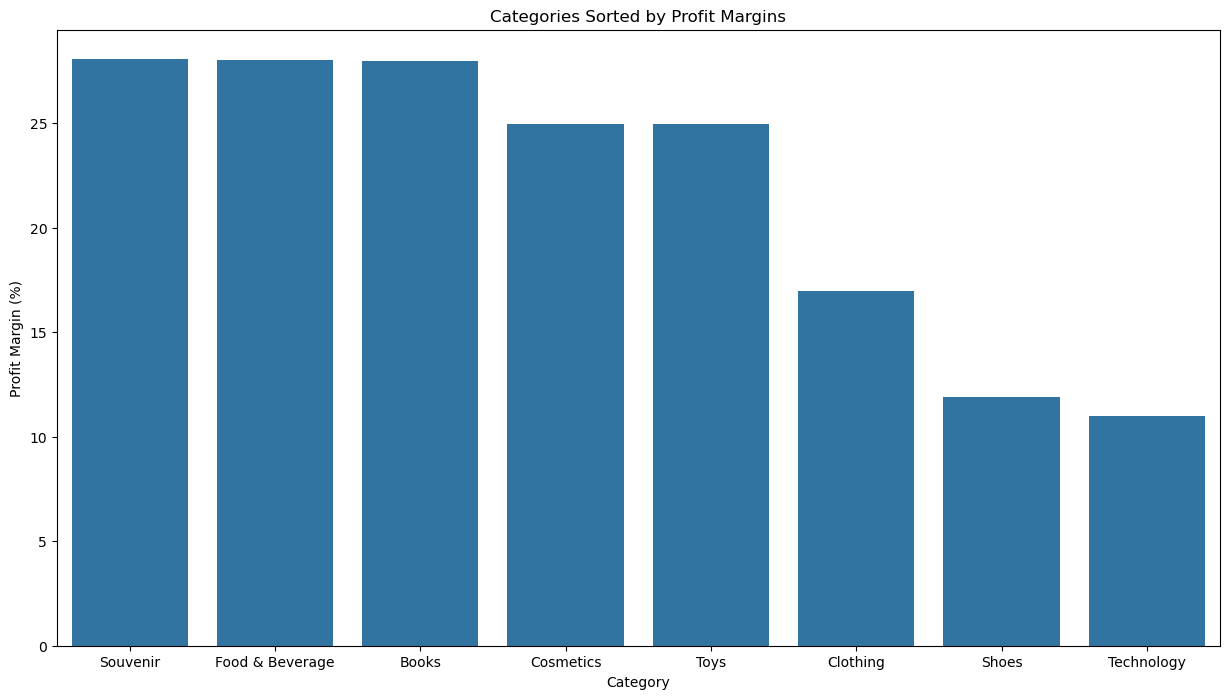

In [50]:
df['Profit Margin'] = (df['Total Profit'] / df['Total Sales']) * 100

# Group by category and calculate the average profit margin
category_profit_margins = df.groupby('category')['Profit Margin'].mean().reset_index()

# Sort categories by highest profit margins
category_profit_margins = category_profit_margins.sort_values(by='Profit Margin', ascending=False)

# Plot the bar chart
plt.figure(figsize=(15, 8))
sns.barplot(y=category_profit_margins['Profit Margin'], x=category_profit_margins['category'])
plt.ylabel("Profit Margin (%)")
plt.xlabel("Category")
plt.title("Categories Sorted by Profit Margins")
plt.show()

# What is the total number of transactions per region for each payment method?

In [51]:
transactions_per_region_payment = df.groupby(['region', 'payment_method']).size().reset_index(name='Total Transactions')
print(transactions_per_region_payment)

     region payment_method  Total Transactions
0   Central           Cash               10319
1   Central    Credit Card                8140
2   Central     Debit Card                4640
3      East           Cash               12738
4      East    Credit Card                9817
5      East     Debit Card                5751
6     South           Cash                7227
7     South    Credit Card                5698
8     South     Debit Card                3284
9      West           Cash               14163
10     West    Credit Card               11276
11     West     Debit Card                6404


# How do sales in different categories compare between males and females?

In [53]:
category_gender_sales = df.groupby(['category', 'gender'])['Total Sales'].sum().reset_index()


In [55]:
print(category_gender_sales)

           category  gender  Total Sales
0             Books  Female    489420.75
1             Books    Male    345238.20
2          Clothing  Female  68260097.84
3          Clothing    Male  45754397.92
4         Cosmetics  Female   4068073.66
5         Cosmetics    Male   2728611.28
6   Food & Beverage  Female    505322.60
7   Food & Beverage    Male    344233.37
8             Shoes  Female  39425167.30
9             Shoes    Male  27128284.17
10         Souvenir  Female    382867.20
11         Souvenir    Male    252957.45
12       Technology  Female  34669950.00
13       Technology    Male  23230200.00
14             Toys  Female   2416046.08
15             Toys    Male   1564380.16


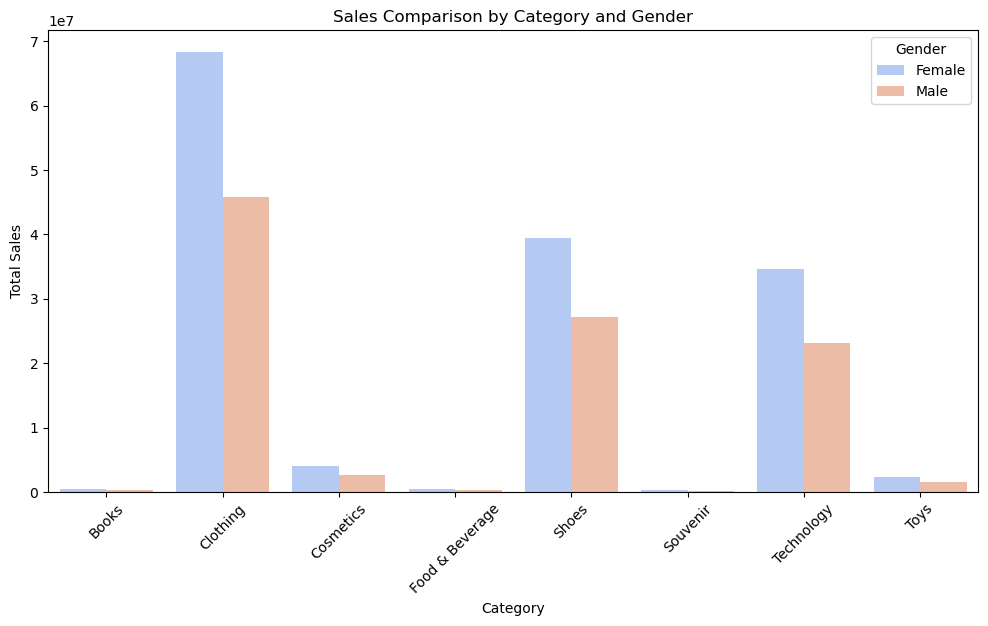

In [54]:
plt.figure(figsize=(12, 6))
sns.barplot(x='category', y='Total Sales', hue='gender', data=category_gender_sales, palette='coolwarm')

# Formatting
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.title("Sales Comparison by Category and Gender")
plt.xticks(rotation=45)
plt.legend(title="Gender")

# Show plot
plt.show()